<a href="https://colab.research.google.com/github/fahrizdimasqy/PembelajaranMesin/blob/main/Quiz4_1197050091_FahrizDimasqy_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url = 'https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/FuelConsumptionCo2.csv'
cdf = pd.read_csv(url)

cdf.describe()

In [ ]:
cdf.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
cdf.dtypes
cdf = cdf.select_dtypes(include = ['int64','float64'])
cdf = cdf.fillna(cdf.mean())
cdf

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


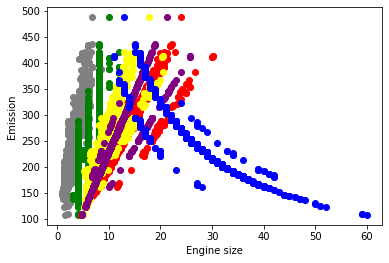

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='grey')
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='green')
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS,  color='red')
plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS,  color='yellow')
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='purple')
plt.scatter(cdf.FUELCONSUMPTION_COMB_MPG, cdf.CO2EMISSIONS,  color='blue')
# plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# get the "engine size" as the independent variable (regressor)
X = cdf.drop('CO2EMISSIONS', axis=1)

# get the "emission" as the dependent variable
y = cdf['CO2EMISSIONS']

print(X)
print(y)



# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

      MODELYEAR  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
0          2014         2.0          4                   9.9   
1          2014         2.4          4                  11.2   
2          2014         1.5          4                   6.0   
3          2014         3.5          6                  12.7   
4          2014         3.5          6                  12.1   
...         ...         ...        ...                   ...   
1062       2014         3.0          6                  13.4   
1063       2014         3.2          6                  13.2   
1064       2014         3.0          6                  13.4   
1065       2014         3.2          6                  12.9   
1066       2014         3.2          6                  14.9   

      FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  
0                     6.7                   8.5                        33  
1                     7.7                   9.6                        29  
2  

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predicting a new result
# y_pred = regressor.predict([[2014,1.3,6,10.0,8.6,4.9,90]])
y_pred = regressor.predict(X_test)
# y_pred = y_pred.reshape(-1, 1)
# y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([354.18  , 209.    , 230.02  , 212.93  , 180.65  , 292.    ,
       212.04  , 277.48  , 201.57  , 334.35  , 309.53  , 437.52  ,
       215.67  , 280.06  , 177.49  , 260.2   , 408.66  , 222.96  ,
       258.85  , 360.85  , 191.08  , 193.63  , 244.04  , 229.44  ,
       132.33  , 282.92  , 274.01  , 295.27  , 247.24  , 117.72  ,
       358.85  , 233.02  , 228.37  , 239.84  , 191.08  , 196.    ,
       293.89  , 221.02  , 225.58  , 238.74  , 186.21  , 184.15  ,
       201.57  , 174.48  , 297.23  , 198.    , 259.88  , 179.    ,
       344.18  , 359.02  , 338.21  , 285.79  , 289.95  , 132.21  ,
       230.02  , 179.    , 281.62  , 161.8815, 258.    , 209.    ,
       206.98  , 204.68  , 225.06  , 295.27  , 261.96  , 298.47  ,
       353.38  , 229.43  , 207.    , 128.51  , 304.34  , 190.3   ,
       353.38  , 298.62  , 337.89  , 216.    , 282.9   , 178.84  ,
       232.52  , 174.48  , 186.98  , 252.86  , 161.314 , 318.57  ,
       379.45  , 246.    , 191.08  , 172.97  , 363.39  , 259.3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


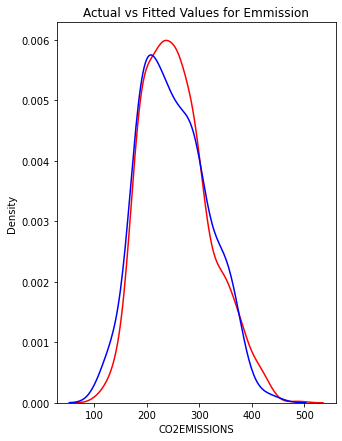

In [ ]:
# Visualising the Random Forest Regression results (higher resolution) with scaling value
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Emmission')


plt.show()
plt.close()